In [1]:
%load_ext autoreload
%autoreload 3

In [2]:
import math
import random
from pathlib import Path

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import numpy as np
from torchvision import models
import pandas as pd
import cv2 as cv
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
sns.set_context("paper", font_scale=1.3)

## Data preparation

In [114]:
# The following parameter names I took from the parameter list that is processed in learn2learn. This is to make
# sure that the same order is preserved that is used in the code itself.
model_to_pnames = {
    "fphtr18": ['module.encoder.encoder.0.weight', 'module.encoder.encoder.1.weight', 'module.encoder.encoder.1.bias', 'module.encoder.encoder.4.0.conv1.weight', 'module.encoder.encoder.4.0.bn1.weight', 'module.encoder.encoder.4.0.bn1.bias', 'module.encoder.encoder.4.0.conv2.weight', 'module.encoder.encoder.4.0.bn2.weight', 'module.encoder.encoder.4.0.bn2.bias', 'module.encoder.encoder.4.1.conv1.weight', 'module.encoder.encoder.4.1.bn1.weight', 'module.encoder.encoder.4.1.bn1.bias', 'module.encoder.encoder.4.1.conv2.weight', 'module.encoder.encoder.4.1.bn2.weight', 'module.encoder.encoder.4.1.bn2.bias', 'module.encoder.encoder.5.0.conv1.weight', 'module.encoder.encoder.5.0.bn1.weight', 'module.encoder.encoder.5.0.bn1.bias', 'module.encoder.encoder.5.0.conv2.weight', 'module.encoder.encoder.5.0.bn2.weight', 'module.encoder.encoder.5.0.bn2.bias', 'module.encoder.encoder.5.0.downsample.0.weight', 'module.encoder.encoder.5.0.downsample.1.weight', 'module.encoder.encoder.5.0.downsample.1.bias', 'module.encoder.encoder.5.1.conv1.weight', 'module.encoder.encoder.5.1.bn1.weight', 'module.encoder.encoder.5.1.bn1.bias', 'module.encoder.encoder.5.1.conv2.weight', 'module.encoder.encoder.5.1.bn2.weight', 'module.encoder.encoder.5.1.bn2.bias', 'module.encoder.encoder.6.0.conv1.weight', 'module.encoder.encoder.6.0.bn1.weight', 'module.encoder.encoder.6.0.bn1.bias', 'module.encoder.encoder.6.0.conv2.weight', 'module.encoder.encoder.6.0.bn2.weight', 'module.encoder.encoder.6.0.bn2.bias', 'module.encoder.encoder.6.0.downsample.0.weight', 'module.encoder.encoder.6.0.downsample.1.weight', 'module.encoder.encoder.6.0.downsample.1.bias', 'module.encoder.encoder.6.1.conv1.weight', 'module.encoder.encoder.6.1.bn1.weight', 'module.encoder.encoder.6.1.bn1.bias', 'module.encoder.encoder.6.1.conv2.weight', 'module.encoder.encoder.6.1.bn2.weight', 'module.encoder.encoder.6.1.bn2.bias', 'module.encoder.encoder.7.0.conv1.weight', 'module.encoder.encoder.7.0.bn1.weight', 'module.encoder.encoder.7.0.bn1.bias', 'module.encoder.encoder.7.0.conv2.weight', 'module.encoder.encoder.7.0.bn2.weight', 'module.encoder.encoder.7.0.bn2.bias', 'module.encoder.encoder.7.0.downsample.0.weight', 'module.encoder.encoder.7.0.downsample.1.weight', 'module.encoder.encoder.7.0.downsample.1.bias', 'module.encoder.encoder.7.1.conv1.weight', 'module.encoder.encoder.7.1.bn1.weight', 'module.encoder.encoder.7.1.bn1.bias', 'module.encoder.encoder.7.1.conv2.weight', 'module.encoder.encoder.7.1.bn2.weight', 'module.encoder.encoder.7.1.bn2.bias', 'module.encoder.linear.weight', 'module.encoder.linear.bias', 'module.decoder.emb.weight', 'module.decoder.decoder.layers.0.self_attn.in_proj_weight', 'module.decoder.decoder.layers.0.self_attn.in_proj_bias', 'module.decoder.decoder.layers.0.self_attn.out_proj.weight', 'module.decoder.decoder.layers.0.self_attn.out_proj.bias', 'module.decoder.decoder.layers.0.multihead_attn.in_proj_weight', 'module.decoder.decoder.layers.0.multihead_attn.in_proj_bias', 'module.decoder.decoder.layers.0.multihead_attn.out_proj.weight', 'module.decoder.decoder.layers.0.multihead_attn.out_proj.bias', 'module.decoder.decoder.layers.0.linear1.weight', 'module.decoder.decoder.layers.0.linear1.bias', 'module.decoder.decoder.layers.0.linear2.weight', 'module.decoder.decoder.layers.0.linear2.bias', 'module.decoder.decoder.layers.0.norm1.weight', 'module.decoder.decoder.layers.0.norm1.bias', 'module.decoder.decoder.layers.0.norm2.weight', 'module.decoder.decoder.layers.0.norm2.bias', 'module.decoder.decoder.layers.0.norm3.weight', 'module.decoder.decoder.layers.0.norm3.bias', 'module.decoder.decoder.layers.1.self_attn.in_proj_weight', 'module.decoder.decoder.layers.1.self_attn.in_proj_bias', 'module.decoder.decoder.layers.1.self_attn.out_proj.weight', 'module.decoder.decoder.layers.1.self_attn.out_proj.bias', 'module.decoder.decoder.layers.1.multihead_attn.in_proj_weight', 'module.decoder.decoder.layers.1.multihead_attn.in_proj_bias', 'module.decoder.decoder.layers.1.multihead_attn.out_proj.weight', 'module.decoder.decoder.layers.1.multihead_attn.out_proj.bias', 'module.decoder.decoder.layers.1.linear1.weight', 'module.decoder.decoder.layers.1.linear1.bias', 'module.decoder.decoder.layers.1.linear2.weight', 'module.decoder.decoder.layers.1.linear2.bias', 'module.decoder.decoder.layers.1.norm1.weight', 'module.decoder.decoder.layers.1.norm1.bias', 'module.decoder.decoder.layers.1.norm2.weight', 'module.decoder.decoder.layers.1.norm2.bias', 'module.decoder.decoder.layers.1.norm3.weight', 'module.decoder.decoder.layers.1.norm3.bias', 'module.decoder.decoder.layers.2.self_attn.in_proj_weight', 'module.decoder.decoder.layers.2.self_attn.in_proj_bias', 'module.decoder.decoder.layers.2.self_attn.out_proj.weight', 'module.decoder.decoder.layers.2.self_attn.out_proj.bias', 'module.decoder.decoder.layers.2.multihead_attn.in_proj_weight', 'module.decoder.decoder.layers.2.multihead_attn.in_proj_bias', 'module.decoder.decoder.layers.2.multihead_attn.out_proj.weight', 'module.decoder.decoder.layers.2.multihead_attn.out_proj.bias', 'module.decoder.decoder.layers.2.linear1.weight', 'module.decoder.decoder.layers.2.linear1.bias', 'module.decoder.decoder.layers.2.linear2.weight', 'module.decoder.decoder.layers.2.linear2.bias', 'module.decoder.decoder.layers.2.norm1.weight', 'module.decoder.decoder.layers.2.norm1.bias', 'module.decoder.decoder.layers.2.norm2.weight', 'module.decoder.decoder.layers.2.norm2.bias', 'module.decoder.decoder.layers.2.norm3.weight', 'module.decoder.decoder.layers.2.norm3.bias', 'module.decoder.decoder.layers.3.self_attn.in_proj_weight', 'module.decoder.decoder.layers.3.self_attn.in_proj_bias', 'module.decoder.decoder.layers.3.self_attn.out_proj.weight', 'module.decoder.decoder.layers.3.self_attn.out_proj.bias', 'module.decoder.decoder.layers.3.multihead_attn.in_proj_weight', 'module.decoder.decoder.layers.3.multihead_attn.in_proj_bias', 'module.decoder.decoder.layers.3.multihead_attn.out_proj.weight', 'module.decoder.decoder.layers.3.multihead_attn.out_proj.bias', 'module.decoder.decoder.layers.3.linear1.weight', 'module.decoder.decoder.layers.3.linear1.bias', 'module.decoder.decoder.layers.3.linear2.weight', 'module.decoder.decoder.layers.3.linear2.bias', 'module.decoder.decoder.layers.3.norm1.weight', 'module.decoder.decoder.layers.3.norm1.bias', 'module.decoder.decoder.layers.3.norm2.weight', 'module.decoder.decoder.layers.3.norm2.bias', 'module.decoder.decoder.layers.3.norm3.weight', 'module.decoder.decoder.layers.3.norm3.bias', 'module.decoder.decoder.layers.4.self_attn.in_proj_weight', 'module.decoder.decoder.layers.4.self_attn.in_proj_bias', 'module.decoder.decoder.layers.4.self_attn.out_proj.weight', 'module.decoder.decoder.layers.4.self_attn.out_proj.bias', 'module.decoder.decoder.layers.4.multihead_attn.in_proj_weight', 'module.decoder.decoder.layers.4.multihead_attn.in_proj_bias', 'module.decoder.decoder.layers.4.multihead_attn.out_proj.weight', 'module.decoder.decoder.layers.4.multihead_attn.out_proj.bias', 'module.decoder.decoder.layers.4.linear1.weight', 'module.decoder.decoder.layers.4.linear1.bias', 'module.decoder.decoder.layers.4.linear2.weight', 'module.decoder.decoder.layers.4.linear2.bias', 'module.decoder.decoder.layers.4.norm1.weight', 'module.decoder.decoder.layers.4.norm1.bias', 'module.decoder.decoder.layers.4.norm2.weight', 'module.decoder.decoder.layers.4.norm2.bias', 'module.decoder.decoder.layers.4.norm3.weight', 'module.decoder.decoder.layers.4.norm3.bias', 'module.decoder.decoder.layers.5.self_attn.in_proj_weight', 'module.decoder.decoder.layers.5.self_attn.in_proj_bias', 'module.decoder.decoder.layers.5.self_attn.out_proj.weight', 'module.decoder.decoder.layers.5.self_attn.out_proj.bias', 'module.decoder.decoder.layers.5.multihead_attn.in_proj_weight', 'module.decoder.decoder.layers.5.multihead_attn.in_proj_bias', 'module.decoder.decoder.layers.5.multihead_attn.out_proj.weight', 'module.decoder.decoder.layers.5.multihead_attn.out_proj.bias', 'module.decoder.decoder.layers.5.linear1.weight', 'module.decoder.decoder.layers.5.linear1.bias', 'module.decoder.decoder.layers.5.linear2.weight', 'module.decoder.decoder.layers.5.linear2.bias', 'module.decoder.decoder.layers.5.norm1.weight', 'module.decoder.decoder.layers.5.norm1.bias', 'module.decoder.decoder.layers.5.norm2.weight', 'module.decoder.decoder.layers.5.norm2.bias', 'module.decoder.decoder.layers.5.norm3.weight', 'module.decoder.decoder.layers.5.norm3.bias', 'module.decoder.clf.weight', 'module.decoder.clf.bias'],
    "sar18": ['encoder.encoder.0.weight', 'encoder.encoder.1.weight', 'encoder.encoder.1.bias', 'encoder.encoder.4.0.conv1.weight', 'encoder.encoder.4.0.bn1.weight', 'encoder.encoder.4.0.bn1.bias', 'encoder.encoder.4.0.conv2.weight', 'encoder.encoder.4.0.bn2.weight', 'encoder.encoder.4.0.bn2.bias', 'encoder.encoder.4.1.conv1.weight', 'encoder.encoder.4.1.bn1.weight', 'encoder.encoder.4.1.bn1.bias', 'encoder.encoder.4.1.conv2.weight', 'encoder.encoder.4.1.bn2.weight', 'encoder.encoder.4.1.bn2.bias', 'encoder.encoder.5.0.conv1.weight', 'encoder.encoder.5.0.bn1.weight', 'encoder.encoder.5.0.bn1.bias', 'encoder.encoder.5.0.conv2.weight', 'encoder.encoder.5.0.bn2.weight', 'encoder.encoder.5.0.bn2.bias', 'encoder.encoder.5.0.downsample.0.weight', 'encoder.encoder.5.0.downsample.1.weight', 'encoder.encoder.5.0.downsample.1.bias', 'encoder.encoder.5.1.conv1.weight', 'encoder.encoder.5.1.bn1.weight', 'encoder.encoder.5.1.bn1.bias', 'encoder.encoder.5.1.conv2.weight', 'encoder.encoder.5.1.bn2.weight', 'encoder.encoder.5.1.bn2.bias', 'encoder.encoder.6.0.conv1.weight', 'encoder.encoder.6.0.bn1.weight', 'encoder.encoder.6.0.bn1.bias', 'encoder.encoder.6.0.conv2.weight', 'encoder.encoder.6.0.bn2.weight', 'encoder.encoder.6.0.bn2.bias', 'encoder.encoder.6.0.downsample.0.weight', 'encoder.encoder.6.0.downsample.1.weight', 'encoder.encoder.6.0.downsample.1.bias', 'encoder.encoder.6.1.conv1.weight', 'encoder.encoder.6.1.bn1.weight', 'encoder.encoder.6.1.bn1.bias', 'encoder.encoder.6.1.conv2.weight', 'encoder.encoder.6.1.bn2.weight', 'encoder.encoder.6.1.bn2.bias', 'encoder.encoder.7.0.conv1.weight', 'encoder.encoder.7.0.bn1.weight', 'encoder.encoder.7.0.bn1.bias', 'encoder.encoder.7.0.conv2.weight', 'encoder.encoder.7.0.bn2.weight', 'encoder.encoder.7.0.bn2.bias', 'encoder.encoder.7.0.downsample.0.weight', 'encoder.encoder.7.0.downsample.1.weight', 'encoder.encoder.7.0.downsample.1.bias', 'encoder.encoder.7.1.conv1.weight', 'encoder.encoder.7.1.bn1.weight', 'encoder.encoder.7.1.bn1.bias', 'encoder.encoder.7.1.conv2.weight', 'encoder.encoder.7.1.bn2.weight', 'encoder.encoder.7.1.bn2.bias', 'encoder.linear.weight', 'encoder.linear.bias', 'decoder.emb.weight', 'decoder.decoder.layers.0.self_attn.in_proj_weight', 'decoder.decoder.layers.0.self_attn.in_proj_bias', 'decoder.decoder.layers.0.self_attn.out_proj.weight', 'decoder.decoder.layers.0.self_attn.out_proj.bias', 'decoder.decoder.layers.0.multihead_attn.in_proj_weight', 'decoder.decoder.layers.0.multihead_attn.in_proj_bias', 'decoder.decoder.layers.0.multihead_attn.out_proj.weight', 'decoder.decoder.layers.0.multihead_attn.out_proj.bias', 'decoder.decoder.layers.0.linear1.weight', 'decoder.decoder.layers.0.linear1.bias', 'decoder.decoder.layers.0.linear2.weight', 'decoder.decoder.layers.0.linear2.bias', 'decoder.decoder.layers.0.norm1.weight', 'decoder.decoder.layers.0.norm1.bias', 'decoder.decoder.layers.0.norm2.weight', 'decoder.decoder.layers.0.norm2.bias', 'decoder.decoder.layers.0.norm3.weight', 'decoder.decoder.layers.0.norm3.bias', 'decoder.decoder.layers.1.self_attn.in_proj_weight', 'decoder.decoder.layers.1.self_attn.in_proj_bias', 'decoder.decoder.layers.1.self_attn.out_proj.weight', 'decoder.decoder.layers.1.self_attn.out_proj.bias', 'decoder.decoder.layers.1.multihead_attn.in_proj_weight', 'decoder.decoder.layers.1.multihead_attn.in_proj_bias', 'decoder.decoder.layers.1.multihead_attn.out_proj.weight', 'decoder.decoder.layers.1.multihead_attn.out_proj.bias', 'decoder.decoder.layers.1.linear1.weight', 'decoder.decoder.layers.1.linear1.bias', 'decoder.decoder.layers.1.linear2.weight', 'decoder.decoder.layers.1.linear2.bias', 'decoder.decoder.layers.1.norm1.weight', 'decoder.decoder.layers.1.norm1.bias', 'decoder.decoder.layers.1.norm2.weight', 'decoder.decoder.layers.1.norm2.bias', 'decoder.decoder.layers.1.norm3.weight', 'decoder.decoder.layers.1.norm3.bias', 'decoder.decoder.layers.2.self_attn.in_proj_weight', 'decoder.decoder.layers.2.self_attn.in_proj_bias', 'decoder.decoder.layers.2.self_attn.out_proj.weight', 'decoder.decoder.layers.2.self_attn.out_proj.bias', 'decoder.decoder.layers.2.multihead_attn.in_proj_weight', 'decoder.decoder.layers.2.multihead_attn.in_proj_bias', 'decoder.decoder.layers.2.multihead_attn.out_proj.weight', 'decoder.decoder.layers.2.multihead_attn.out_proj.bias', 'decoder.decoder.layers.2.linear1.weight', 'decoder.decoder.layers.2.linear1.bias', 'decoder.decoder.layers.2.linear2.weight', 'decoder.decoder.layers.2.linear2.bias', 'decoder.decoder.layers.2.norm1.weight', 'decoder.decoder.layers.2.norm1.bias', 'decoder.decoder.layers.2.norm2.weight', 'decoder.decoder.layers.2.norm2.bias', 'decoder.decoder.layers.2.norm3.weight', 'decoder.decoder.layers.2.norm3.bias', 'decoder.decoder.layers.3.self_attn.in_proj_weight', 'decoder.decoder.layers.3.self_attn.in_proj_bias', 'decoder.decoder.layers.3.self_attn.out_proj.weight', 'decoder.decoder.layers.3.self_attn.out_proj.bias', 'decoder.decoder.layers.3.multihead_attn.in_proj_weight', 'decoder.decoder.layers.3.multihead_attn.in_proj_bias', 'decoder.decoder.layers.3.multihead_attn.out_proj.weight', 'decoder.decoder.layers.3.multihead_attn.out_proj.bias', 'decoder.decoder.layers.3.linear1.weight', 'decoder.decoder.layers.3.linear1.bias', 'decoder.decoder.layers.3.linear2.weight', 'decoder.decoder.layers.3.linear2.bias', 'decoder.decoder.layers.3.norm1.weight', 'decoder.decoder.layers.3.norm1.bias', 'decoder.decoder.layers.3.norm2.weight', 'decoder.decoder.layers.3.norm2.bias', 'decoder.decoder.layers.3.norm3.weight', 'decoder.decoder.layers.3.norm3.bias', 'decoder.decoder.layers.4.self_attn.in_proj_weight', 'decoder.decoder.layers.4.self_attn.in_proj_bias', 'decoder.decoder.layers.4.self_attn.out_proj.weight', 'decoder.decoder.layers.4.self_attn.out_proj.bias', 'decoder.decoder.layers.4.multihead_attn.in_proj_weight', 'decoder.decoder.layers.4.multihead_attn.in_proj_bias', 'decoder.decoder.layers.4.multihead_attn.out_proj.weight', 'decoder.decoder.layers.4.multihead_attn.out_proj.bias', 'decoder.decoder.layers.4.linear1.weight', 'decoder.decoder.layers.4.linear1.bias', 'decoder.decoder.layers.4.linear2.weight', 'decoder.decoder.layers.4.linear2.bias', 'decoder.decoder.layers.4.norm1.weight', 'decoder.decoder.layers.4.norm1.bias', 'decoder.decoder.layers.4.norm2.weight', 'decoder.decoder.layers.4.norm2.bias', 'decoder.decoder.layers.4.norm3.weight', 'decoder.decoder.layers.4.norm3.bias', 'decoder.decoder.layers.5.self_attn.in_proj_weight', 'decoder.decoder.layers.5.self_attn.in_proj_bias', 'decoder.decoder.layers.5.self_attn.out_proj.weight', 'decoder.decoder.layers.5.self_attn.out_proj.bias', 'decoder.decoder.layers.5.multihead_attn.in_proj_weight', 'decoder.decoder.layers.5.multihead_attn.in_proj_bias', 'decoder.decoder.layers.5.multihead_attn.out_proj.weight', 'decoder.decoder.layers.5.multihead_attn.out_proj.bias', 'decoder.decoder.layers.5.linear1.weight', 'decoder.decoder.layers.5.linear1.bias', 'decoder.decoder.layers.5.linear2.weight', 'decoder.decoder.layers.5.linear2.bias', 'decoder.decoder.layers.5.norm1.weight', 'decoder.decoder.layers.5.norm1.bias', 'decoder.decoder.layers.5.norm2.weight', 'decoder.decoder.layers.5.norm2.bias', 'decoder.decoder.layers.5.norm3.weight', 'decoder.decoder.layers.5.norm3.bias', 'decoder.clf.weight', 'decoder.clf.bias'],
    "fphtr31": ['encoder.encoder.conv1_1.weight', 'encoder.encoder.conv1_1.bias', 'encoder.encoder.bn1_1.weight', 'encoder.encoder.bn1_1.bias', 'encoder.encoder.conv1_2.weight', 'encoder.encoder.conv1_2.bias', 'encoder.encoder.bn1_2.weight', 'encoder.encoder.bn1_2.bias', 'encoder.encoder.block2.0.conv1.weight', 'encoder.encoder.block2.0.bn1.weight', 'encoder.encoder.block2.0.bn1.bias', 'encoder.encoder.block2.0.conv2.weight', 'encoder.encoder.block2.0.bn2.weight', 'encoder.encoder.block2.0.bn2.bias', 'encoder.encoder.block2.0.downsample.0.weight', 'encoder.encoder.block2.0.downsample.1.weight', 'encoder.encoder.block2.0.downsample.1.bias', 'encoder.encoder.conv2.weight', 'encoder.encoder.conv2.bias', 'encoder.encoder.bn2.weight', 'encoder.encoder.bn2.bias', 'encoder.encoder.block3.0.conv1.weight', 'encoder.encoder.block3.0.bn1.weight', 'encoder.encoder.block3.0.bn1.bias', 'encoder.encoder.block3.0.conv2.weight', 'encoder.encoder.block3.0.bn2.weight', 'encoder.encoder.block3.0.bn2.bias', 'encoder.encoder.block3.1.conv1.weight', 'encoder.encoder.block3.1.bn1.weight', 'encoder.encoder.block3.1.bn1.bias', 'encoder.encoder.block3.1.conv2.weight', 'encoder.encoder.block3.1.bn2.weight', 'encoder.encoder.block3.1.bn2.bias', 'encoder.encoder.conv3.weight', 'encoder.encoder.conv3.bias', 'encoder.encoder.bn3.weight', 'encoder.encoder.bn3.bias', 'encoder.encoder.block4.0.conv1.weight', 'encoder.encoder.block4.0.bn1.weight', 'encoder.encoder.block4.0.bn1.bias', 'encoder.encoder.block4.0.conv2.weight', 'encoder.encoder.block4.0.bn2.weight', 'encoder.encoder.block4.0.bn2.bias', 'encoder.encoder.block4.0.downsample.0.weight', 'encoder.encoder.block4.0.downsample.1.weight', 'encoder.encoder.block4.0.downsample.1.bias', 'encoder.encoder.block4.1.conv1.weight', 'encoder.encoder.block4.1.bn1.weight', 'encoder.encoder.block4.1.bn1.bias', 'encoder.encoder.block4.1.conv2.weight', 'encoder.encoder.block4.1.bn2.weight', 'encoder.encoder.block4.1.bn2.bias', 'encoder.encoder.block4.2.conv1.weight', 'encoder.encoder.block4.2.bn1.weight', 'encoder.encoder.block4.2.bn1.bias', 'encoder.encoder.block4.2.conv2.weight', 'encoder.encoder.block4.2.bn2.weight', 'encoder.encoder.block4.2.bn2.bias', 'encoder.encoder.block4.3.conv1.weight', 'encoder.encoder.block4.3.bn1.weight', 'encoder.encoder.block4.3.bn1.bias', 'encoder.encoder.block4.3.conv2.weight', 'encoder.encoder.block4.3.bn2.weight', 'encoder.encoder.block4.3.bn2.bias', 'encoder.encoder.block4.4.conv1.weight', 'encoder.encoder.block4.4.bn1.weight', 'encoder.encoder.block4.4.bn1.bias', 'encoder.encoder.block4.4.conv2.weight', 'encoder.encoder.block4.4.bn2.weight', 'encoder.encoder.block4.4.bn2.bias', 'encoder.encoder.conv4.weight', 'encoder.encoder.conv4.bias', 'encoder.encoder.bn4.weight', 'encoder.encoder.bn4.bias', 'encoder.encoder.block5.0.conv1.weight', 'encoder.encoder.block5.0.bn1.weight', 'encoder.encoder.block5.0.bn1.bias', 'encoder.encoder.block5.0.conv2.weight', 'encoder.encoder.block5.0.bn2.weight', 'encoder.encoder.block5.0.bn2.bias', 'encoder.encoder.block5.1.conv1.weight', 'encoder.encoder.block5.1.bn1.weight', 'encoder.encoder.block5.1.bn1.bias', 'encoder.encoder.block5.1.conv2.weight', 'encoder.encoder.block5.1.bn2.weight', 'encoder.encoder.block5.1.bn2.bias', 'encoder.encoder.block5.2.conv1.weight', 'encoder.encoder.block5.2.bn1.weight', 'encoder.encoder.block5.2.bn1.bias', 'encoder.encoder.block5.2.conv2.weight', 'encoder.encoder.block5.2.bn2.weight', 'encoder.encoder.block5.2.bn2.bias', 'encoder.encoder.conv5.weight', 'encoder.encoder.conv5.bias', 'encoder.encoder.bn5.weight', 'encoder.encoder.bn5.bias', 'encoder.linear.weight', 'encoder.linear.bias', 'decoder.emb.weight', 'decoder.decoder.layers.0.self_attn.in_proj_weight', 'decoder.decoder.layers.0.self_attn.in_proj_bias', 'decoder.decoder.layers.0.self_attn.out_proj.weight', 'decoder.decoder.layers.0.self_attn.out_proj.bias', 'decoder.decoder.layers.0.multihead_attn.in_proj_weight', 'decoder.decoder.layers.0.multihead_attn.in_proj_bias', 'decoder.decoder.layers.0.multihead_attn.out_proj.weight', 'decoder.decoder.layers.0.multihead_attn.out_proj.bias', 'decoder.decoder.layers.0.linear1.weight', 'decoder.decoder.layers.0.linear1.bias', 'decoder.decoder.layers.0.linear2.weight', 'decoder.decoder.layers.0.linear2.bias', 'decoder.decoder.layers.0.norm1.weight', 'decoder.decoder.layers.0.norm1.bias', 'decoder.decoder.layers.0.norm2.weight', 'decoder.decoder.layers.0.norm2.bias', 'decoder.decoder.layers.0.norm3.weight', 'decoder.decoder.layers.0.norm3.bias', 'decoder.decoder.layers.1.self_attn.in_proj_weight', 'decoder.decoder.layers.1.self_attn.in_proj_bias', 'decoder.decoder.layers.1.self_attn.out_proj.weight', 'decoder.decoder.layers.1.self_attn.out_proj.bias', 'decoder.decoder.layers.1.multihead_attn.in_proj_weight', 'decoder.decoder.layers.1.multihead_attn.in_proj_bias', 'decoder.decoder.layers.1.multihead_attn.out_proj.weight', 'decoder.decoder.layers.1.multihead_attn.out_proj.bias', 'decoder.decoder.layers.1.linear1.weight', 'decoder.decoder.layers.1.linear1.bias', 'decoder.decoder.layers.1.linear2.weight', 'decoder.decoder.layers.1.linear2.bias', 'decoder.decoder.layers.1.norm1.weight', 'decoder.decoder.layers.1.norm1.bias', 'decoder.decoder.layers.1.norm2.weight', 'decoder.decoder.layers.1.norm2.bias', 'decoder.decoder.layers.1.norm3.weight', 'decoder.decoder.layers.1.norm3.bias', 'decoder.decoder.layers.2.self_attn.in_proj_weight', 'decoder.decoder.layers.2.self_attn.in_proj_bias', 'decoder.decoder.layers.2.self_attn.out_proj.weight', 'decoder.decoder.layers.2.self_attn.out_proj.bias', 'decoder.decoder.layers.2.multihead_attn.in_proj_weight', 'decoder.decoder.layers.2.multihead_attn.in_proj_bias', 'decoder.decoder.layers.2.multihead_attn.out_proj.weight', 'decoder.decoder.layers.2.multihead_attn.out_proj.bias', 'decoder.decoder.layers.2.linear1.weight', 'decoder.decoder.layers.2.linear1.bias', 'decoder.decoder.layers.2.linear2.weight', 'decoder.decoder.layers.2.linear2.bias', 'decoder.decoder.layers.2.norm1.weight', 'decoder.decoder.layers.2.norm1.bias', 'decoder.decoder.layers.2.norm2.weight', 'decoder.decoder.layers.2.norm2.bias', 'decoder.decoder.layers.2.norm3.weight', 'decoder.decoder.layers.2.norm3.bias', 'decoder.decoder.layers.3.self_attn.in_proj_weight', 'decoder.decoder.layers.3.self_attn.in_proj_bias', 'decoder.decoder.layers.3.self_attn.out_proj.weight', 'decoder.decoder.layers.3.self_attn.out_proj.bias', 'decoder.decoder.layers.3.multihead_attn.in_proj_weight', 'decoder.decoder.layers.3.multihead_attn.in_proj_bias', 'decoder.decoder.layers.3.multihead_attn.out_proj.weight', 'decoder.decoder.layers.3.multihead_attn.out_proj.bias', 'decoder.decoder.layers.3.linear1.weight', 'decoder.decoder.layers.3.linear1.bias', 'decoder.decoder.layers.3.linear2.weight', 'decoder.decoder.layers.3.linear2.bias', 'decoder.decoder.layers.3.norm1.weight', 'decoder.decoder.layers.3.norm1.bias', 'decoder.decoder.layers.3.norm2.weight', 'decoder.decoder.layers.3.norm2.bias', 'decoder.decoder.layers.3.norm3.weight', 'decoder.decoder.layers.3.norm3.bias', 'decoder.decoder.layers.4.self_attn.in_proj_weight', 'decoder.decoder.layers.4.self_attn.in_proj_bias', 'decoder.decoder.layers.4.self_attn.out_proj.weight', 'decoder.decoder.layers.4.self_attn.out_proj.bias', 'decoder.decoder.layers.4.multihead_attn.in_proj_weight', 'decoder.decoder.layers.4.multihead_attn.in_proj_bias', 'decoder.decoder.layers.4.multihead_attn.out_proj.weight', 'decoder.decoder.layers.4.multihead_attn.out_proj.bias', 'decoder.decoder.layers.4.linear1.weight', 'decoder.decoder.layers.4.linear1.bias', 'decoder.decoder.layers.4.linear2.weight', 'decoder.decoder.layers.4.linear2.bias', 'decoder.decoder.layers.4.norm1.weight', 'decoder.decoder.layers.4.norm1.bias', 'decoder.decoder.layers.4.norm2.weight', 'decoder.decoder.layers.4.norm2.bias', 'decoder.decoder.layers.4.norm3.weight', 'decoder.decoder.layers.4.norm3.bias', 'decoder.decoder.layers.5.self_attn.in_proj_weight', 'decoder.decoder.layers.5.self_attn.in_proj_bias', 'decoder.decoder.layers.5.self_attn.out_proj.weight', 'decoder.decoder.layers.5.self_attn.out_proj.bias', 'decoder.decoder.layers.5.multihead_attn.in_proj_weight', 'decoder.decoder.layers.5.multihead_attn.in_proj_bias', 'decoder.decoder.layers.5.multihead_attn.out_proj.weight', 'decoder.decoder.layers.5.multihead_attn.out_proj.bias', 'decoder.decoder.layers.5.linear1.weight', 'decoder.decoder.layers.5.linear1.bias', 'decoder.decoder.layers.5.linear2.weight', 'decoder.decoder.layers.5.linear2.bias', 'decoder.decoder.layers.5.norm1.weight', 'decoder.decoder.layers.5.norm1.bias', 'decoder.decoder.layers.5.norm2.weight', 'decoder.decoder.layers.5.norm2.bias', 'decoder.decoder.layers.5.norm3.weight', 'decoder.decoder.layers.5.norm3.bias', 'decoder.clf.weight', 'decoder.clf.bias']
}

# Remove the 'module' prefix from the parameter names
for model, pnms in model_to_pnames.items():
    if model == "fphtr18":
        model_to_pnames[model] = [".".join(pn.split(".")[1:]) for pn in pnames]

In [90]:
for pn in model_to_pnames["fphtr31"]: print(pn)

encoder.encoder.conv1_1.weight
encoder.encoder.conv1_1.bias
encoder.encoder.bn1_1.weight
encoder.encoder.bn1_1.bias
encoder.encoder.conv1_2.weight
encoder.encoder.conv1_2.bias
encoder.encoder.bn1_2.weight
encoder.encoder.bn1_2.bias
encoder.encoder.block2.0.conv1.weight
encoder.encoder.block2.0.bn1.weight
encoder.encoder.block2.0.bn1.bias
encoder.encoder.block2.0.conv2.weight
encoder.encoder.block2.0.bn2.weight
encoder.encoder.block2.0.bn2.bias
encoder.encoder.block2.0.downsample.0.weight
encoder.encoder.block2.0.downsample.1.weight
encoder.encoder.block2.0.downsample.1.bias
encoder.encoder.conv2.weight
encoder.encoder.conv2.bias
encoder.encoder.bn2.weight
encoder.encoder.bn2.bias
encoder.encoder.block3.0.conv1.weight
encoder.encoder.block3.0.bn1.weight
encoder.encoder.block3.0.bn1.bias
encoder.encoder.block3.0.conv2.weight
encoder.encoder.block3.0.bn2.weight
encoder.encoder.block3.0.bn2.bias
encoder.encoder.block3.1.conv1.weight
encoder.encoder.block3.1.bn1.weight
encoder.encoder.block

In [91]:
def load_checkpoint(model, meta_model, size, seed):

    assert model in ["fphtr", "sar"]
    assert meta_model in ["MAML", "MAMLmSGD", "MetaHTR"]
    assert size in [18, 31]
    assert seed in range(1, 6)

    ckpt_path = Path(f"/home/tobias/master-thesis-lightning-logs/"
                     f"{meta_model}-{model}{size}_lr=8e-6_initial-inner-lr=1e-4_nsteps=1_shots=16_ways=8_seed={seed}/"
                     f"checkpoints/").glob("*.ckpt")
    ckpt_path = list(ckpt_path)[0]  # note: we assume there is only one checkpoint
    print(f"Loading {ckpt_path}")


    ckpt = torch.load(ckpt_path, map_location="cpu")
    state_dict = ckpt["state_dict"]
    return state_dict

In [92]:
def postprocess_parameter_names(state_dict):
    # Remove the 'model' prefix from the parameter names
    new = dict()  # new state_dict
    for k, v in state_dict.items():
        new[".".join(k.split(".")[1:])] = v
    return new

In [93]:
def gather_llrs(state_dict):
    # Gather all learnable learning rates.
    llrs = {int(pn.split(".")[-3]): p.item() for pn, p in state_dict.items() if pn.endswith("transform.alpha")}
    lr_names, lr_vals = zip(*sorted(llrs.items(), key=lambda x: x[0]))
#     lr_names = list(llrs.keys())
#     lr_vals = list(llrs.values())
    return llrs, lr_names, lr_vals

In [98]:
def get_layer_to_lr(state_dict, llrs, model_name):    
#     pnames = [pn for pn in state_dict.keys() if not pn.endswith("transform.alpha")]
#     pnames = [pn for pn in state_dict.keys() if not (pn.endswith("transform.alpha") or "pos_emb" in pn)]
    pnames = model_to_pnames[model_name]
    layer_to_lr = {layer: llrs[i] for i, layer in enumerate(pnames)}
    return layer_to_lr

## Plots

In [109]:
def plot_layerid_vs_lr(lr_names, lr_vals, stages=None):
    if stages is not None:
        data = pd.DataFrame({
            "layer index": lr_names,
            "learning rate": lr_vals,
            "stage": stages
        })
        f, ax = plt.subplots(figsize = (15, 6))
        sns.set_color_codes('pastel')
        sns.barplot(x = 'layer index', y = 'learning rate', data = data,
                    hue = 'stage', ci=None)
        #             color = 'b', edgecolor = 'w')
        # sns.set_color_codes('muted')
        # ax.legend(ncol = 2, loc = 'lower right')
        sns.despine(left = True, bottom = True)  # remove bounding box around figure
#         plt.xticks([25, 50, 75, 100, 125, 150, 175, 200])
        plt.xticks([25, 50, 75, 100, 125, 150])
        f.savefig("lr-per-layer.pdf")
    else:
        plt.figure(figsize=(12, 8))
        plt.bar(lr_names, lr_vals, align="edge")
        plt.grid(True)
        plt.ylabel("learning rate")
        plt.xlabel("layer index")
    plt.tight_layout()
    plt.show()

#### FPHTR-18

In [112]:
model = "fphtr"
meta_model = "MAMLmSGD"
size = 18
seed = 4  # randomly picked

pnames = model_to_pnames[f"{model}{size}"]
state_dict = load_checkpoint(model, meta_model, size, seed)
state_dict = postprocess_parameter_names(state_dict)
llrs, lr_names, lr_vals = gather_llrs(state_dict)
layer_to_llr = get_layer_to_lr(state_dict, llrs, f"{model}{size}")

stages = [("ResNet" if pn.startswith("encoder") else "Transformer") for pn in pnames]

Loading /home/tobias/master-thesis-lightning-logs/MAMLmSGD-fphtr18_lr=8e-6_initial-inner-lr=1e-4_nsteps=1_shots=16_ways=8_seed=1/checkpoints/MetaHTR-epoch=16-char_error_rate=0.1278-word_error_rate=0.1592.ckpt


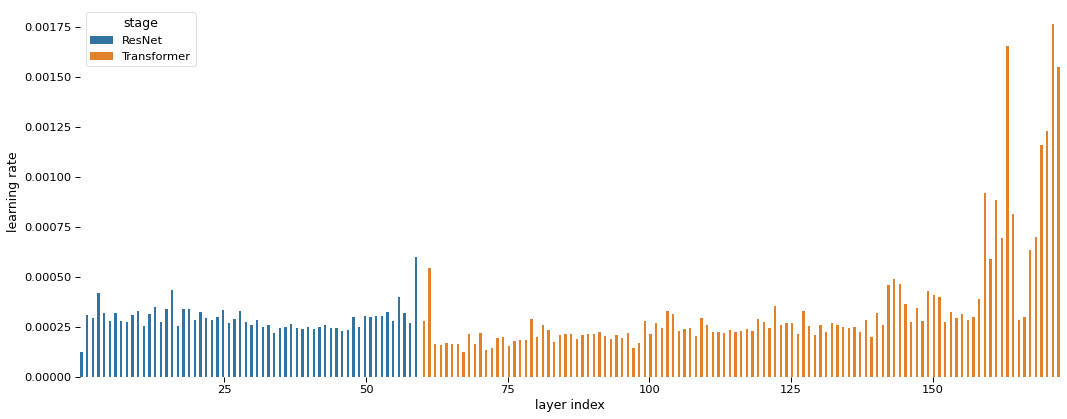

In [113]:
plot_layerid_vs_lr(lr_names, lr_vals, stages)

#### FPHTR-31

In [105]:
model = "fphtr"
meta_model = "MAMLmSGD"
size = 31
seed = 1  # randomly picked

pnames = model_to_pnames[f"{model}{size}"]
state_dict = load_checkpoint(model, meta_model, size, seed)
state_dict = postprocess_parameter_names(state_dict)
llrs, lr_names, lr_vals = gather_llrs(state_dict)
layer_to_llr = get_layer_to_lr(state_dict, llrs, f"{model}{size}")

stages = [("ResNet" if pn.startswith("encoder") else "Transformer") for pn in pnames]

Loading /home/tobias/master-thesis-lightning-logs/MAMLmSGD-fphtr31_lr=8e-6_initial-inner-lr=1e-4_nsteps=1_shots=16_ways=8_seed=1/checkpoints/MetaHTR-epoch=5-char_error_rate=0.0729-word_error_rate=0.1075.ckpt


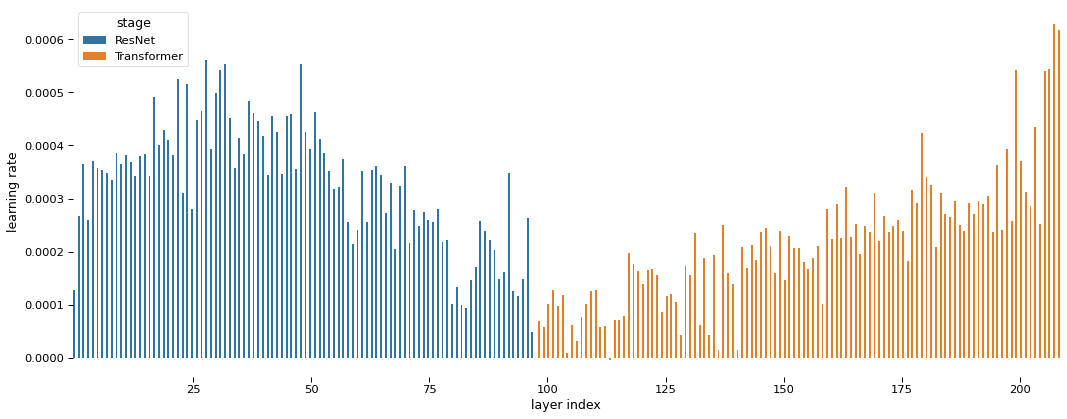

In [108]:
plot_layerid_vs_lr(lr_names, lr_vals, stages)

#### SAR-18

In [115]:
model = "sar"
meta_model = "MAMLmSGD"
size = 18
seed = 3  # randomly picked

pnames = model_to_pnames[f"{model}{size}"]
state_dict = load_checkpoint(model, meta_model, size, seed)
state_dict = postprocess_parameter_names(state_dict)
llrs, lr_names, lr_vals = gather_llrs(state_dict)
layer_to_llr = get_layer_to_lr(state_dict, llrs, f"{model}{size}")

stages = [("ResNet" if pn.startswith("encoder") else "Transformer") for pn in pnames]

IndexError: list index out of range

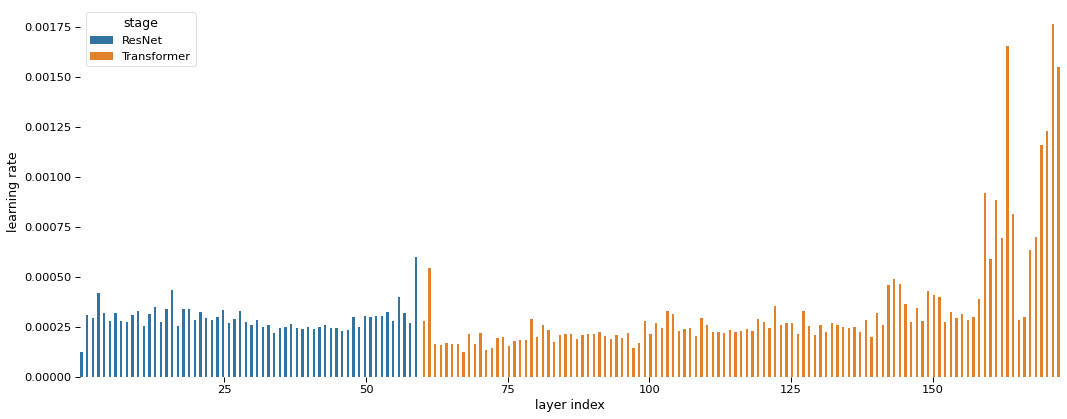

In [116]:
plot_layerid_vs_lr(lr_names, lr_vals, stages)

## Plot highest learning rates

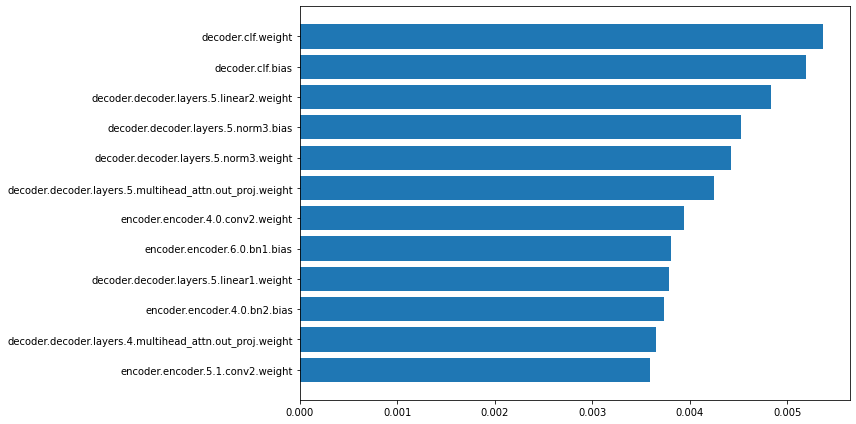

In [18]:
to_show = 12

plt.figure(figsize=(12, 6))
xs, ys = zip(*sorted(list(layer_to_lr.items()), key=lambda x: x[1]))
plt.barh(xs[-to_show:], ys[-to_show:])
plt.tight_layout()

plt.savefig("highest_inner_loop_lrs.png")
plt.show()

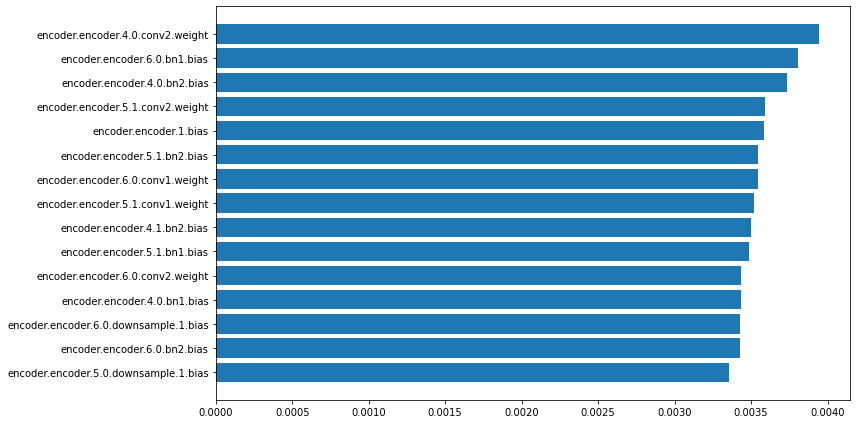

In [19]:
to_show = 15

plt.figure(figsize=(12, 6))
xs, ys = zip(*sorted(list(layer_to_lr.items())[:100], key=lambda x: x[1]))
plt.barh(xs[-to_show:], ys[-to_show:])
plt.tight_layout()

plt.savefig("highest_inner_loop_lrs.png")
plt.show()

## Old

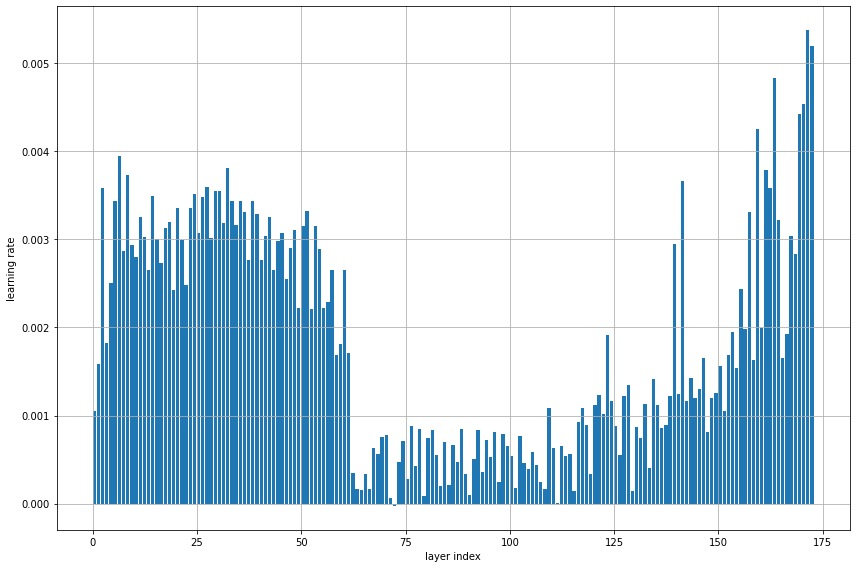

In [20]:
# Plot layer idx vs. lr
plt.figure(figsize=(12, 8))
plt.bar(lr_names, lr_vals, align="edge")
plt.grid(True)
plt.ylabel("learning rate")
plt.xlabel("layer index")

plt.tight_layout()
plt.show()